# 피마 인디언 당뇨병 데이터

- 데이터 활용 목적 : 당뇨병 여부를 판단하는 머신러닝 예측 모델을 개발
- 데이터 개요
    - 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
    - 일반적으로 알려진 당뇨병의 원인은 식습관과 유전
        - 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속됨
        - 20세기 후반 서구화된 식습관으로 많은 당뇨 환자가 발생
        
    - 피처
        - Pregnancies : 임신 횟수
        - Glucose : 포도당 부하 검사 수치
        - BloodPressure : 혈압(mm Hg)
        - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
        - Insulin : 혈청 인슐린(mm U/ml)
        - BMI : 체질량 지수(체중(kg) / 키(m))^2
        - DiabetesPedigreeFuction : 당뇨 내력 가중치 값
        - Age : 나이
        - Outcome : 클래스 결정 값(0 또는 1)

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("./data/diabetes.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
df = df[(df["BloodPressure"] != 0) & (df["SkinThickness"] != 0) & (df["Insulin"] != 0) & (df["BMI"] != 0)]

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [45]:
x = df.drop("Outcome", axis = 1).reset_index(drop = True)
y = df["Outcome"].reset_index(drop = True)

In [46]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
388,0,181,88,44,510,43.3,0.222,26
389,1,128,88,39,110,36.5,1.057,37
390,2,88,58,26,16,28.4,0.766,22
391,10,101,76,48,180,32.9,0.171,63


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score

In [48]:
ss = StandardScaler()
rs = RobustScaler()
scaled_x = ss.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = x.columns)

In [49]:
new_x = sm.add_constant(scaled_x)
model = sm.Logit(y, scaled_x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.512816
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  393
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.1921
Time:                        16:33:33   Log-Likelihood:                -201.54
converged:                       True   LL-Null:                       -249.45
Covariance Type:            nonrobust   LLR p-value:                 7.822e-18
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.2309      0.183      1.265      0.206      -0.127       0.589
Glucose                      1.1371      0.183      6.220      0.000       0.779       1.495
BloodPressure               -0.0125      0.134     -0.093      0.926      -0.276       0.251
SkinThickness                0.0578      0.165      0.350      0.726      -0.266       0.382
Insulin                     -0.1278      0.163     -0.783      0.434      -0.448       0.192
BMI                          0.4216      0.179      2.353      0.019       0.070       0.773
DiabetesPedigreeFunction     0.4051      0.142      2.858      0.004       0.127       0.683
Age                          0.3277      0.196      1.668      0.095      -0.057       0.713
============================================================================================
"""

In [50]:
new_x = sm.add_constant(scaled_x.drop(["BloodPressure", "Insulin", "SkinThickness", "Pregnancies"], axis = 1))
model = sm.Logit(y, new_x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441778
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  393
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.3040
Time:                        16:33:35   Log-Likelihood:                -173.62
converged:                       True   LL-Null:                       -249.45
Covariance Type:            nonrobust   LLR p-value:                 8.953e-32
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0005      0.142     -7.041      0.000      -1.279      -0.722
Glucose                      1.1363      0.156      7.266      0.000       0.830       1.443
BMI                          0.5223      0.142      3.674      0.000       0.244       0.801
DiabetesPedigreeFunction     0.3749      0.145      2.592      0.010       0.091       0.658
Age                          0.5400      0.137      3.945      0.000       0.272       0.808
============================================================================================
"""

In [51]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.2,Glucose
2,1.1,BMI
3,1.0,DiabetesPedigreeFunction
4,1.1,Age


In [52]:
new_x.columns

Index(['const', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [53]:
# 평가지표 출력하는 함수 _ StandardScale
def get_clf_eval_ss(y_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('roc_auc: {:.4f}'.format(roc_auc))

In [54]:
x = df[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 0)

In [55]:
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [56]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [57]:
scores = cross_validate(logi, scaled_train, y_train, scoring = "roc_auc", return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]), np.mean(scores["train_score"]))
print(logi.score(scaled_test, y_test))

[0.75375375 0.89039039 0.88438438 0.91141141 0.89035088]
0.8660581634265846 0.8773139525463399
0.7711864406779662


In [58]:
pred = logi.predict(scaled_test)
pred_proba = logi.predict_proba(scaled_test)[:,1]
get_clf_eval_ss(y_test, pred, pred_proba)

정확도: 0.7712
정밀도: 0.7000
재현율: 0.5385
F1: 0.6087
roc_auc: 0.8286


In [59]:
import matplotlib.ticker as ticker
 
def precision_recall_curve_plot(y_test , pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

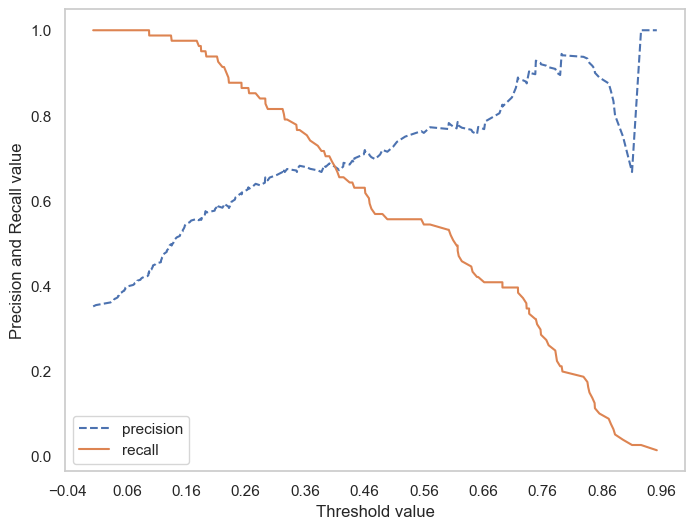

In [216]:
precision_recall_curve_plot(y_test, pred_proba)

In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [33]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
et = ExtraTreesClassifier(n_jobs = -1, random_state = 0)
gb = GradientBoostingClassifier(random_state = 0)

In [34]:
rf.fit(x_train, y_train)
scores = cross_validate(rf, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = rf.predict(x_test)
pred_proba = rf.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

[0.76363636 0.76363636 0.78181818 0.85454545 0.81818182]
0.7963636363636364
정확도: 0.7797
정밀도: 0.6970
재현율: 0.5897
F1: 0.6389
roc_auc: 0.8317


In [35]:
et.fit(x_train, y_train)
scores = cross_validate(et, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = et.predict(x_test)
pred_proba = et.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

[0.72727273 0.8        0.8        0.83636364 0.78181818]
0.7890909090909091
정확도: 0.7373
정밀도: 0.6053
재현율: 0.5897
F1: 0.5974
roc_auc: 0.7997


In [36]:
gb.fit(x_train, y_train)
scores = cross_validate(gb, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = gb.predict(x_test)
pred_proba = gb.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

[0.72727273 0.70909091 0.83636364 0.85454545 0.8       ]
0.7854545454545455
정확도: 0.7797
정밀도: 0.6857
재현율: 0.6154
F1: 0.6486
roc_auc: 0.8265


In [358]:
from sklearn.preprocessing import Binarizer